<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/My_sentiment_analysis_using_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using bert

Lets use distilbert-base-uncased-finetuned-sst-2-english [Hugging Face](https://huggingface.co/distilbert)

https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

## Model Details

- **Model Description:** This model is a fine-tune checkpoint of - DistilBERT-base-uncased, fine-tuned on SST-2. This model reaches an accuracy of 91.3 on the dev set (for comparison, Bert bert-base-uncased version reaches an accuracy of 92.7).

- **Developed by**: Hugging Face
- **Model Type**: Text Classification
- **Language(s)**: English


https://en.wikipedia.org/wiki/Sentiment_analysis

https://aws.amazon.com/what-is/sentiment-analysis


## Utilities

In [ ]:
import zipfile
import requests
import os
import pandas

# Dada uma url e um local de arquivo (destination) faz o download do conteudo da url no arquivo
def download_file(url, destination):
    try:
        response = requests.get(url) # Faz a requisicao do arquivo
        response.raise_for_status()  # Verifica se houve algum erro na requisição
        conteudo = response.content  # Guarda o conteudo binario da resposta da requisicao
        # Coloca o conteudo da requisicao em um arquivo local
        # Cria um novo arquivo e insere o conteudo neste arquivo
        with open(destination, mode='wb') as file:
            file.write(conteudo)
    except requests.exceptions.MissingSchema:
        # Caso seja uma excecao de url invalida
        print("URL inválida. Certifique-se de fornecer uma URL válida.")
        print("Download cancelado!")
        raise ValueError("URL inválida. Certifique-se de fornecer uma URL válida.")
    except requests.exceptions.ConnectionError:
        # Caso seja uma excecao de comunicacao de rede
        print(f"Erro na conexão!")
        print("Download cancelado!")
        raise ValueError("Erro na conexão!")
    except IOError:
        # Caso aconteca um erro de IO do arquivo
        print(f"Arquivo {destination} inválido!")
        print("Download cancelado!")
        raise ValueError(f"Arquivo {destination} inválido!")

def unzip_file(my_file, path_to_unzip=None):
    try:
        with zipfile.ZipFile(my_file, 'r') as zip_ref:
            zip_ref.extractall(path_to_unzip)
    except Exception as ex:
      raise ValueError(f"Erro ao descompactar: {str(ex)}")

# Dataset

In [ ]:
# Top 20 Play Store App Reviews (Daily Update) from Kaggle
# data source: https://www.kaggle.com/datasets/odins0n/top-20-play-store-app-reviews-daily-update

MY_DATA_ZIP = "https://github.com/armandossrecife/teste/raw/main/Dropbox.csv.zip"
DIRETORIO_CORRENTE = os.getcwd()

try:
  print("Fazendo download do arquivo...")
  download_file(url=MY_DATA_ZIP, destination=DIRETORIO_CORRENTE + "/Dropbox.csv.zip")
  print("Download realizado com sucesso!")
  unzip_file(my_file=DIRETORIO_CORRENTE + "/Dropbox.csv.zip", path_to_unzip=DIRETORIO_CORRENTE)
  print("Descompactar realizado com sucesso!")
except Exception as ex:
  print(ex)

In [ ]:
df = pandas.read_csv("Dropbox.csv")
df.head()

,reviewId,content,score
0,495a9b6d-4972-49b8-9fce-47306ba430f7,I mostly use the mobile version for viewing fi...,3
1,8dd6e5e9-efd6-491c-b9be-d28925c52bd7,Help me,5
2,bdf7ff2e-254b-4757-ab49-fc466bac979a,Phone App doesn't even let me sign up/sign in....,1
3,c4bdf3e1-dc2c-4b3b-ac51-bc1c1035938e,Can not upload my offline PC files online. Eve...,1
4,7eaf17fc-7179-43d7-a6cf-ece9a993da63,Lets you trial Dropbox Plus but have to enter ...,1


# Sample Dataset

In [ ]:
df = df.sample(200)
df

,reviewId,content,score
6978,683d4adc-aa09-4822-998b-3ca3021239a3,Utterly Useless Automatically uploaded 400 scr...,1
2989,2c0bf8fe-5d3a-4801-9979-f2b15d9faaac,no user friendly,1
5906,614bcac5-7e9e-49b5-a41c-2eed0ffdf8ac,My account is hacked Way beyond your comprehen...,1
2535,7ab297f4-2da8-4744-9b56-9889f050b558,Hate hate hate this app Shows apparently rando...,2
2428,1b4abfe3-bf62-4d76-a612-4c7df5911a53,I keep deleting items and they are still here ...,1
...,...,...,...
3377,88670468-fabe-40dd-9066-0ef29705fb19,"The fact that there isn't a very easy, very ac...",3
818,34fcdc39-da80-429c-a221-af6913c80876,I've been paying for Dropbox for a few years n...,1
1941,d4515a23-ad98-4267-8d5a-28678df0c621,it won't let me send my videos,1
4022,1b74b401-db0e-48e5-819c-a3f9dc60a8dd,👌 👏 👍🏻,5


# Sentiment Analysis

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import pipeline

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

npl = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

texts = list(df.content.values)

results = npl(texts)

In [ ]:
for text, result, score in zip(texts, results, df.score.values):
  print(f"Text: {text}")
  print(f"result: {result}")
  print(f"score: {score}")

Text: Utterly Useless Automatically uploaded 400 scrap images and ignored the ones I actually selected / needed. No option for mass upload OR mass deleted, utterly useless for an app that mass uploads whatever tf it wants. Never again!!
result: {'label': 'NEGATIVE', 'score': 0.9997581839561462}
score: 1
Text: no user friendly
result: {'label': 'NEGATIVE', 'score': 0.9996722936630249}
score: 1
Text: My account is hacked Way beyond your comprehension or abilities obviously
result: {'label': 'NEGATIVE', 'score': 0.9997609257698059}
score: 1
Text: Hate hate hate this app Shows apparently random files. I have marked files as STARRED and AVAILABLE OFFLINE. Maybe just maybe those are my MOST IMPORTANT files. The ones that should SHOW FIRST?? Instead there is some random set of files shown. This cost me money as I couldn't find my STARRED and AVAILABLE OFFLINE passenger ferry ticket quickly so had to buy a new one.
result: {'label': 'NEGATIVE', 'score': 0.9995061159133911}
score: 2
Text: I kee

In [ ]:
df['sentiment'] = [r['label'] for r in results]
df['my_score_analysis'] = [r['score'] for r in results]

In [ ]:
df

,reviewId,content,score,sentiment,my_score_analysis
6978,683d4adc-aa09-4822-998b-3ca3021239a3,Utterly Useless Automatically uploaded 400 scr...,1,NEGATIVE,0.999758
2989,2c0bf8fe-5d3a-4801-9979-f2b15d9faaac,no user friendly,1,NEGATIVE,0.999672
5906,614bcac5-7e9e-49b5-a41c-2eed0ffdf8ac,My account is hacked Way beyond your comprehen...,1,NEGATIVE,0.999761
2535,7ab297f4-2da8-4744-9b56-9889f050b558,Hate hate hate this app Shows apparently rando...,2,NEGATIVE,0.999506
2428,1b4abfe3-bf62-4d76-a612-4c7df5911a53,I keep deleting items and they are still here ...,1,NEGATIVE,0.999773
...,...,...,...,...,...
3377,88670468-fabe-40dd-9066-0ef29705fb19,"The fact that there isn't a very easy, very ac...",3,NEGATIVE,0.999770
818,34fcdc39-da80-429c-a221-af6913c80876,I've been paying for Dropbox for a few years n...,1,NEGATIVE,0.999773
1941,d4515a23-ad98-4267-8d5a-28678df0c621,it won't let me send my videos,1,POSITIVE,0.984963
4022,1b74b401-db0e-48e5-819c-a3f9dc60a8dd,👌 👏 👍🏻,5,NEGATIVE,0.833725


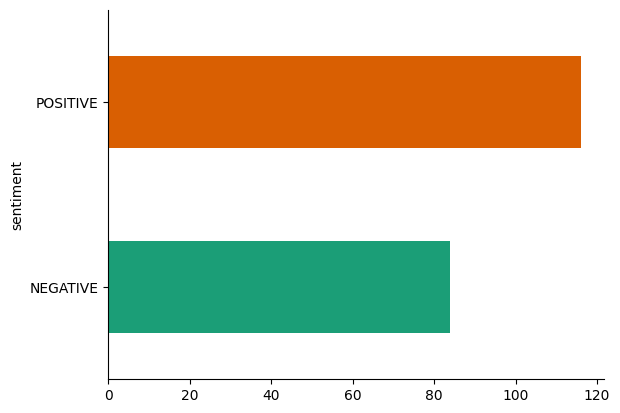

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Tests

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [2]:
classifier("I don't care...")

[{'label': 'NEGATIVE', 'score': 0.9996581077575684}]

In [3]:
classifier("You are the best!")

[{'label': 'POSITIVE', 'score': 0.9998641014099121}]